In [1]:
# Import packages
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
import dill, sys
import copy
import numpy as np
import matplotlib.pyplot as plt
import scarlet

import kuaizi as kz
from kuaizi.display import display_single, SEG_CMAP, display_scarlet_results_tigress
from kuaizi.detection import Data

import astropy.units as u
from astropy import wcs
from astropy.io import fits
from astropy.table import Table, Column, Row, vstack, hstack
from astropy.coordinates import SkyCoord

from PIL import Image

sys.path.append('/home/jiaxuanl/Research/Packages/kuaizi/diezi/scarlet_modeling/script/')

In [15]:
env_dict = {'project': 'HSC', 'name': 'LSBG', 'data_dir': '/scratch/gpfs/jiaxuanl/Data'}
kz.utils.set_env(**env_dict)
kz.set_matplotlib(style='JL', usetex=True, dpi=100, fontsize=16)

## Size distribution 
1. Subtract background contribution
2. Correct for completeness

In [ ]:
from paper_figure import plot_size_distribution_new
kz.set_matplotlib(style='JL', usetex=True, dpi=100, fontsize=16)

### The size distribution of UDGs and UPGs (as of 2022-12-12)

In [6]:
date = '221025'

Total angular area [deg2]: 32.70887732960614
Total angular area [deg2]: 32.70887732960614


sample: 100%|███████████| 6000/6000 [00:05<00:00, 1134.67it/s, 15 steps of size 2.56e-01. acc. prob=0.93]



                mean       std    median      5.0%     95.0%     n_eff     r_hat
         a     -1.46      0.20     -1.45     -1.79     -1.14    897.11      1.00
         b      0.94      0.07      0.94      0.82      1.07    878.70      1.00

Number of divergences: 0
Total angular area [deg2]: 32.36912377009267
Total angular area [deg2]: 32.36912377009267


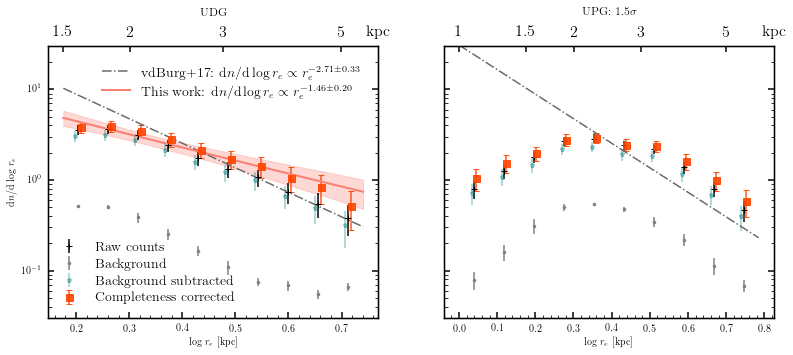

In [7]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(13, 5), sharey=True)

name = 'udg'
GALARY = '/tigress/jiaxuanl/public_html/galary/'
thresh = None

udg_cat = Table.read(
    f'{GALARY}/catalogs/nsa_z001_004/{name}_z001_004_spergel_after_viz_w_missed.fits')
flag = (udg_cat['rhalf_phys'] + udg_cat['rhalf_phys_err'] >= 1.5
       ) & (udg_cat['SB_eff_avg'][:, 0] + udg_cat['SB_eff_avg_err'][:, 0] >= 25)
udg_cat = udg_cat[flag]
udg_cat = udg_cat[udg_cat['completeness'] > 0.1]

_, ind = np.unique(udg_cat['host_name'].data, return_index=True)
total_area = (np.pi * (udg_cat['host_r_vir_ang'].data[ind]**2)).sum() # deg^2 #  - (3/60)**2
print('Total angular area [deg2]:', total_area)

fake_udg_cat = Table.read(f'./Catalog/random_field/fake_{name}_cat_{date}.fits')
fake_udg_cat = fake_udg_cat[fake_udg_cat['completeness'] > 0.1]

fig, ax1 = plot_size_distribution_new(udg_cat, fake_udg_cat, total_area, 24, 
                                      fake_udg_repeats=10*20, name='UDG', ax=ax1, 
                                      range_0=np.array([np.log10(1.5), np.log10(5.5)]),
                                      fit_line=True, refit=True, verbose=True)
ax1.set_ylim(0.03, 30)
xlim = ax1.get_xlim()
# plt.text(0.13 * (xlim[1] - xlim[0]) + xlim[0], 13, 'UDG', fontsize=20,
#          bbox=dict(facecolor='w', alpha=1, edgecolor='none'))

ax1.set_title('UDG')
ax2.set_title('UPG: $1.5\sigma$')


### UPG ###
name = 'upg'
GALARY = '/tigress/jiaxuanl/public_html/galary/'
thresh = 1.5

udg_cat = Table.read(
    f'{GALARY}/catalogs/nsa_z001_004/{name}_z001_004_spergel_after_viz_{thresh}sigma.fits')
udg_cat = udg_cat[udg_cat['completeness'] > 0.1]

_, ind = np.unique(udg_cat['host_name'].data, return_index=True)
total_area = (np.pi * (udg_cat['host_r_vir_ang'].data[ind]**2)).sum() # deg^2 #  - (3/60)**2
print('Total angular area [deg2]:', total_area)

fake_udg_cat = Table.read(f'./Catalog/random_field/fake_{name}_cat_{thresh}sigma_{date}.fits')
fake_udg_cat = fake_udg_cat[fake_udg_cat['completeness'] > 0.1]

fig, ax2 = plot_size_distribution_new(udg_cat, fake_udg_cat, total_area, 24, 
                                  fake_udg_repeats=10*20, name='UPG_1.5sigma', ax=ax2, fit_line=False,
                                  range_0=np.array([np.log10(1), np.log10(6.1)]), 
                                  dots_legend=False, nolinelegend=True)
ax2.set_ylabel('')

import matplotlib
y_minor = matplotlib.ticker.LogLocator(base=10.0, subs=np.arange(1.0, 10.0) * 0.1, numticks=10)
ax2.yaxis.set_minor_locator(y_minor)
ax2.yaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())

# plt.tight_layout()
# plt.savefig('/tigress/jiaxuanl/public_html/figure/udg_paper/size_distribution.pdf', 
#             bbox_inches='tight', dpi=50)

### Whether the size distribution of UDG is a function of distance to the hosts

In [8]:
date = '221025'

Total angular area [deg2]: 32.70887732960614
Total angular area [deg2]: 19.878248857317743
Total angular area [deg2]: 23.491273772921666


Text(0.23275044661950423, 13, 'UDG')

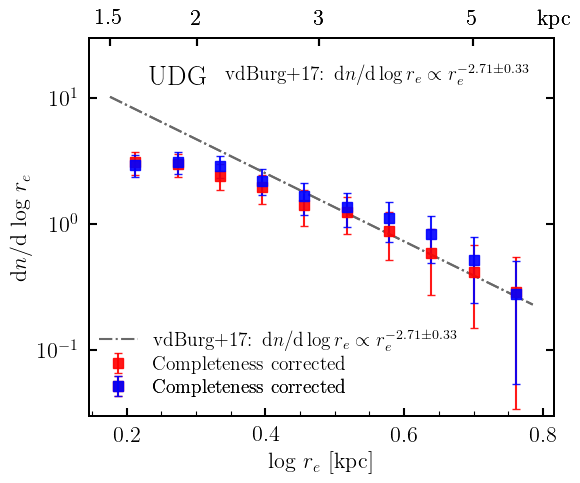

In [11]:
fig, ax1 = plt.subplots(1, 1, figsize=(6, 5), sharey=True)

name = 'udg'
GALARY = '/tigress/jiaxuanl/public_html/galary/'
thresh = None

udg_cat = Table.read(
    f'{GALARY}/catalogs/nsa_z001_004/{name}_z001_004_spergel_after_viz_w_missed.fits')
flag = (udg_cat['rhalf_phys'] + udg_cat['rhalf_phys_err'] >= 1.5
       ) & (udg_cat['SB_eff_avg'][:, 0] + udg_cat['SB_eff_avg_err'][:, 0] >= 25)
udg_cat = udg_cat[flag]
udg_cat = udg_cat[udg_cat['completeness'] > 0.1]

_, ind = np.unique(udg_cat['host_name'].data, return_index=True)
total_area = (np.pi * (udg_cat['host_r_vir_ang'].data[ind]**2)).sum() # deg^2 #  - (3/60)**2
print('Total angular area [deg2]:', total_area)

fake_udg_cat = Table.read(f'./Catalog/random_field/fake_{name}_cat_{date}.fits')
fake_udg_cat = fake_udg_cat[fake_udg_cat['completeness'] > 0.1]


udg_coord = SkyCoord(udg_cat['ra'], udg_cat['dec'], unit='deg')
host_coord = SkyCoord(udg_cat['host_RA'], udg_cat['host_DEC'], unit='deg')
dist = udg_coord.separation(host_coord)
dist_ratio = dist.to(u.deg).value / udg_cat['host_r_vir_ang'].data


temp = udg_cat[dist_ratio >= 0.5]
fig, ax1 = plot_size_distribution_new(temp, fake_udg_cat, total_area, 24, 
                                  fake_udg_repeats=10*20, name='UDG', ax=ax1, color='r',
                                  fit_line=False, refit=True, verbose=True, only_result=True)

temp = udg_cat[dist_ratio <= 0.5]
fig, ax1 = plot_size_distribution_new(temp, fake_udg_cat, total_area, 24, 
                                  fake_udg_repeats=10*20, name='UDG', ax=ax1, color='b',
                                  fit_line=False, refit=True, verbose=True, only_result=True)

ax1.set_ylim(0.03, 30)
xlim = ax1.get_xlim()
plt.text(0.13 * (xlim[1] - xlim[0]) + xlim[0], 13, 'UDG', fontsize=20,
         bbox=dict(facecolor='w', alpha=1, edgecolor='none'))

Total angular area [deg2]: 32.36912377009267
Total angular area [deg2]: 19.900315494420774
Total angular area [deg2]: 19.705923243317258


Text(0.23275044661950423, 13, 'UPG')

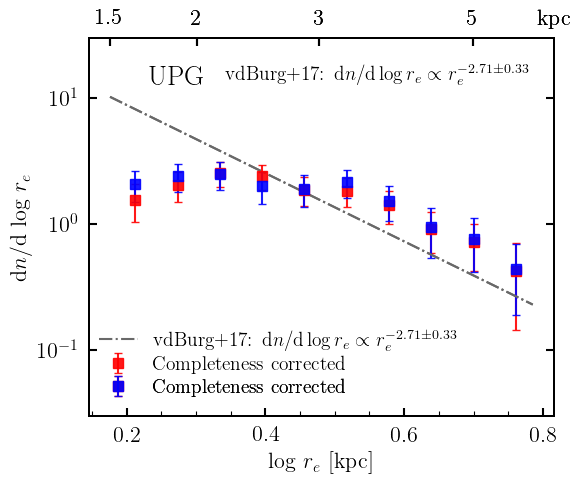

In [12]:
fig, ax1 = plt.subplots(1, 1, figsize=(6, 5), sharey=True)

name = 'upg'
GALARY = '/tigress/jiaxuanl/public_html/galary/'
thresh = 1.5

udg_cat = Table.read(
    f'{GALARY}/catalogs/nsa_z001_004/{name}_z001_004_spergel_after_viz_{thresh}sigma.fits')
udg_cat = udg_cat[udg_cat['completeness'] > 0.1]

_, ind = np.unique(udg_cat['host_name'].data, return_index=True)
total_area = (np.pi * (udg_cat['host_r_vir_ang'].data[ind]**2)).sum() # deg^2 #  - (3/60)**2
print('Total angular area [deg2]:', total_area)

fake_udg_cat = Table.read(f'./Catalog/random_field/fake_{name}_cat_{thresh}sigma_{date}.fits')
fake_udg_cat = fake_udg_cat[fake_udg_cat['completeness'] > 0.1]


udg_coord = SkyCoord(udg_cat['ra'], udg_cat['dec'], unit='deg')
host_coord = SkyCoord(udg_cat['host_RA'], udg_cat['host_DEC'], unit='deg')
dist = udg_coord.separation(host_coord)
dist_ratio = dist.to(u.deg).value / udg_cat['host_r_vir_ang'].data


temp = udg_cat[dist_ratio >= 0.5]
fig, ax1 = plot_size_distribution_new(temp, fake_udg_cat, total_area, 24, 
                                  fake_udg_repeats=10*20, name='UDG', ax=ax1, color='r',
                                  fit_line=False, refit=True, verbose=True, only_result=True)

temp = udg_cat[dist_ratio <= 0.5]
fig, ax1 = plot_size_distribution_new(temp, fake_udg_cat, total_area, 24, 
                                  fake_udg_repeats=10*20, name='UDG', ax=ax1, color='b',
                                  fit_line=False, refit=True, verbose=True, only_result=True)

ax1.set_ylim(0.03, 30)
xlim = ax1.get_xlim()
plt.text(0.13 * (xlim[1] - xlim[0]) + xlim[0], 13, 'UPG', fontsize=20,
         bbox=dict(facecolor='w', alpha=1, edgecolor='none'))

Total angular area [deg2]: 32.70887732960614
Total angular area [deg2]: 25.20581018604345
Total angular area [deg2]: 14.319147305619973


Text(0.23275044661950423, 13, 'UDG')

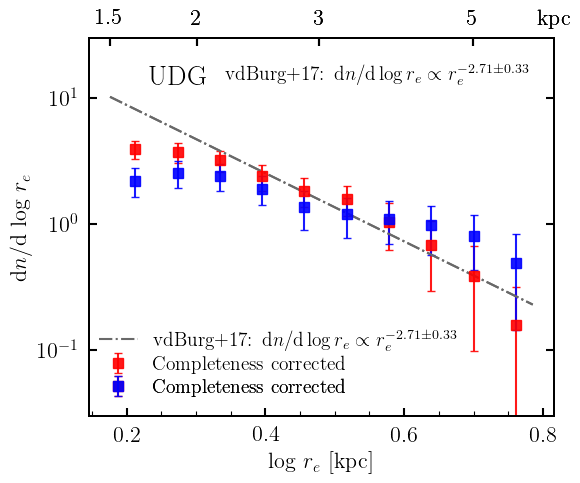

In [14]:
fig, ax1 = plt.subplots(1, 1, figsize=(6, 5), sharey=True)

name = 'udg'
GALARY = '/tigress/jiaxuanl/public_html/galary/'
thresh = None

udg_cat = Table.read(
    f'{GALARY}/catalogs/nsa_z001_004/{name}_z001_004_spergel_after_viz_w_missed.fits')
flag = (udg_cat['rhalf_phys'] + udg_cat['rhalf_phys_err'] >= 1.5
       ) & (udg_cat['SB_eff_avg'][:, 0] + udg_cat['SB_eff_avg_err'][:, 0] >= 25)
udg_cat = udg_cat[flag]
udg_cat = udg_cat[udg_cat['completeness'] > 0.1]

_, ind = np.unique(udg_cat['host_name'].data, return_index=True)
total_area = (np.pi * (udg_cat['host_r_vir_ang'].data[ind]**2)).sum() # deg^2 #  - (3/60)**2
print('Total angular area [deg2]:', total_area)

fake_udg_cat = Table.read(f'./Catalog/random_field/fake_{name}_cat_{date}.fits')
fake_udg_cat = fake_udg_cat[fake_udg_cat['completeness'] > 0.1]

### Quenching or not
quenched_intercept = -0.23
V = udg_cat['mag'][:, 0] - 0.5784 * \
    (udg_cat['mag'][:, 0] - udg_cat['mag'][:, 1]) - 0.0038
V_abs = V - 25 - 5 * np.log10(udg_cat['host_ang_diam_dist'].data *
                              (1 + udg_cat['host_z'].data)**2)
# The criterion for quenching is from Carlsten+22. 
# The original intercept is -0.23. I think 0.28 works better for our sample.
delta_MS = -(udg_cat['g-i'] - (-0.067 * V_abs + quenched_intercept))

temp = udg_cat[delta_MS < 0]
fig, ax1 = plot_size_distribution_new(temp, fake_udg_cat, total_area, 24, 
                                  fake_udg_repeats=10*20, name='UDG', ax=ax1, color='r',
                                  fit_line=False, refit=True, verbose=True, only_result=True)

temp = udg_cat[delta_MS >= 0]
fig, ax1 = plot_size_distribution_new(temp, fake_udg_cat, total_area, 24, 
                                  fake_udg_repeats=10*20, name='UDG', ax=ax1, color='b',
                                  fit_line=False, refit=True, verbose=True, only_result=True)

ax1.set_ylim(0.03, 30)
xlim = ax1.get_xlim()
plt.text(0.13 * (xlim[1] - xlim[0]) + xlim[0], 13, 'UDG', fontsize=20,
         bbox=dict(facecolor='w', alpha=1, edgecolor='none'))

Total angular area [deg2]: 32.36912377009267
Total angular area [deg2]: 17.063366033382046
Total angular area [deg2]: 20.222334097502216


Text(0.23275044661950423, 13, 'UPG')

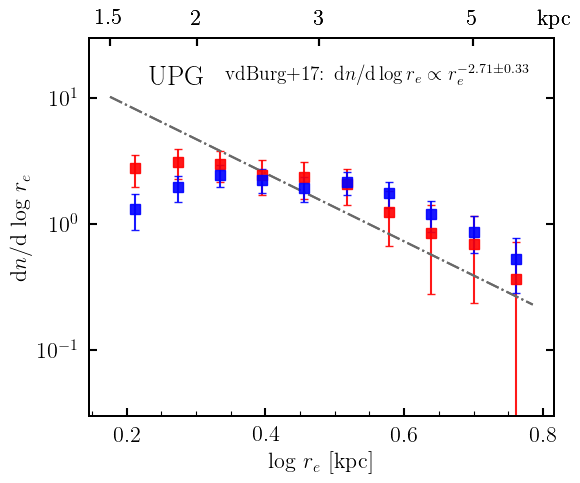

In [22]:
fig, ax1 = plt.subplots(1, 1, figsize=(6, 5), sharey=True)

name = 'upg'
GALARY = '/tigress/jiaxuanl/public_html/galary/'
thresh = 1.5

udg_cat = Table.read(
    f'{GALARY}/catalogs/nsa_z001_004/{name}_z001_004_spergel_after_viz_{thresh}sigma.fits')
udg_cat = udg_cat[udg_cat['completeness'] > 0.1]

_, ind = np.unique(udg_cat['host_name'].data, return_index=True)
total_area = (np.pi * (udg_cat['host_r_vir_ang'].data[ind]**2)).sum() # deg^2 #  - (3/60)**2
print('Total angular area [deg2]:', total_area)

fake_udg_cat = Table.read(f'./Catalog/random_field/fake_{name}_cat_{thresh}sigma_{date}.fits')
fake_udg_cat = fake_udg_cat[fake_udg_cat['completeness'] > 0.1]


### Quenching or not
quenched_intercept = -0.23
V = udg_cat['mag'][:, 0] - 0.5784 * \
    (udg_cat['mag'][:, 0] - udg_cat['mag'][:, 1]) - 0.0038
V_abs = V - 25 - 5 * np.log10(udg_cat['host_ang_diam_dist'].data *
                              (1 + udg_cat['host_z'].data)**2)
# The criterion for quenching is from Carlsten+22. 
# The original intercept is -0.23. I think 0.28 works better for our sample.
delta_MS = -(udg_cat['g-i'] - (-0.067 * V_abs + quenched_intercept))


temp = udg_cat[delta_MS < 0]
fig, ax1 = plot_size_distribution_new(temp, fake_udg_cat, total_area, 24, 
                                  fake_udg_repeats=10*20, name='UDG', ax=ax1, color='r',
                                  fit_line=False, refit=True, verbose=True, only_result=True,
                                      label='Quiescent', dots_legend=False, nolinelegend=False)

temp = udg_cat[delta_MS >= 0]
fig, ax1 = plot_size_distribution_new(temp, fake_udg_cat, total_area, 24, 
                                  fake_udg_repeats=10*20, name='UDG', ax=ax1, color='b',
                                  fit_line=False, refit=True, verbose=True, only_result=True,
                                      label='Star-forming', dots_legend=False, nolinelegend=False)

ax1.set_ylim(0.03, 30)
xlim = ax1.get_xlim()
plt.text(0.13 * (xlim[1] - xlim[0]) + xlim[0], 13, 'UPG', fontsize=20,
         bbox=dict(facecolor='w', alpha=1, edgecolor='none'))

In [22]:
cen = [0.20655319, 0.26747705, 0.3284009,  0.38932476, 0.45024862, 0.51117248,
 0.57209633, 0.63302019, 0.69394405, 0.75486791]

n_corr = [1.55136411, 2.07181153 ,2.54643481, 2.41766813, 1.8788098,  1.85497131,
 1.4181605,  0.91816121, 0.71571937, 0.42539818]

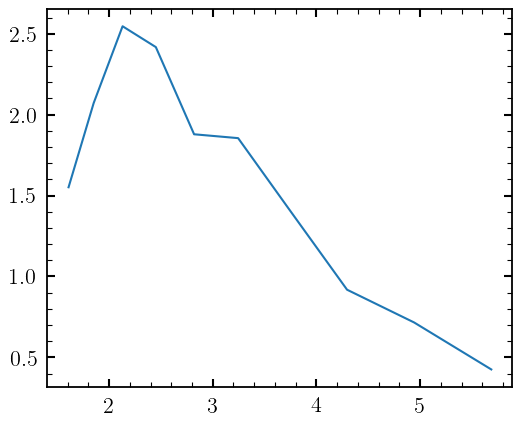

In [25]:
plt.plot(10**np.array(cen), n_corr)

Total angular area [deg2]: 32.36912377009267
Total angular area [deg2]: 19.900315494420774
Total angular area [deg2]: 19.705923243317258


Text(0.23275044661950423, 13, 'UPG')

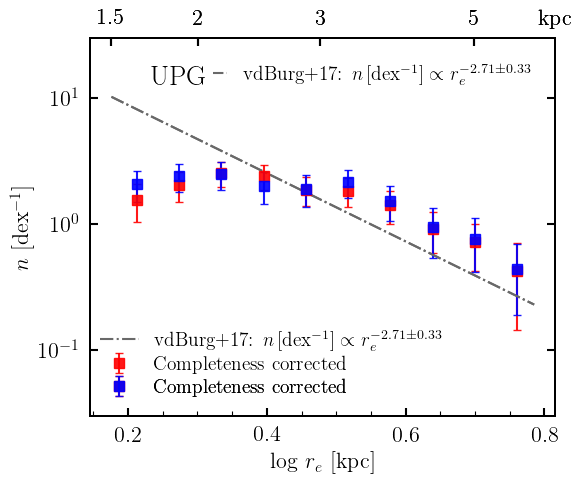

In [37]:
fig, ax1 = plt.subplots(1, 1, figsize=(6, 5), sharey=True)

name = 'upg'
GALARY = '/tigress/jiaxuanl/public_html/galary/'
thresh = 1.5

udg_cat = Table.read(
    f'{GALARY}/catalogs/nsa_z001_004/{name}_z001_004_spergel_after_viz_{thresh}sigma.fits')
udg_cat = udg_cat[udg_cat['completeness'] > 0.1]

_, ind = np.unique(udg_cat['host_name'].data, return_index=True)
total_area = (np.pi * (udg_cat['host_r_vir_ang'].data[ind]**2)).sum() # deg^2 #  - (3/60)**2
print('Total angular area [deg2]:', total_area)

fake_udg_cat = Table.read(f'./Catalog/random_field/fake_{name}_cat_{thresh}sigma_{date}.fits')
fake_udg_cat = fake_udg_cat[fake_udg_cat['completeness'] > 0.1]


udg_coord = SkyCoord(udg_cat['ra'], udg_cat['dec'], unit='deg')
host_coord = SkyCoord(udg_cat['host_RA'], udg_cat['host_DEC'], unit='deg')
dist = udg_coord.separation(host_coord)
dist_ratio = dist.to(u.deg).value / udg_cat['host_r_vir_ang'].data


temp = udg_cat[dist_ratio >= 0.5]
fig, ax1 = plot_size_distribution_new(temp, fake_udg_cat, total_area, 24, 
                                  fake_udg_repeats=10*20, name='UDG', ax=ax1, color='r',
                                  fit_line=False, refit=True, verbose=True, only_result=True)

temp = udg_cat[dist_ratio <= 0.5]
fig, ax1 = plot_size_distribution_new(temp, fake_udg_cat, total_area, 24, 
                                  fake_udg_repeats=10*20, name='UDG', ax=ax1, color='b',
                                  fit_line=False, refit=True, verbose=True, only_result=True)

ax1.set_ylim(0.03, 30)
xlim = ax1.get_xlim()
plt.text(0.13 * (xlim[1] - xlim[0]) + xlim[0], 13, 'UPG', fontsize=20,
         bbox=dict(facecolor='w', alpha=1, edgecolor='none'))

## No difference!

---

---

## Spatial distribution

In [5]:
from colossus.cosmology import cosmology
from colossus.halo import profile_nfw, profile_einasto
from sample_cuts import moving_binned_statistic
from paper_figure import plot_radial_number_profile

In [6]:
date = '221025'

-------------------------------------------------------------------------------------
Profile fit: Varying 2 / 2 parameters.
Could not find analytical derivative function for quantity Sigma.
Found solution in 6 steps. Best-fit parameters:
Parameter       rhos = 3.98e+01 [1.03e+01 .. 1.54e+02]
Parameter         rs = 1.40e-01 [8.33e-02 .. 2.36e-01]
chi2 / Ndof = 33.4 / 10 = 3.34
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Profile fit: Varying 3 / 3 parameters.
Could not find analytical derivative function for quantity Sigma.
Found solution in 47 steps. Best-fit parameters:
Parameter       rhos = 1.00e+06 [2.14e-48 .. 4.71e+59]
Parameter         rs = 8.37e-04 [2.08e-27 .. 3.37e+20]
Parameter      alpha = 3.82e-02 [1.07e-05 .. 1.36e+02]
chi2 / Ndof = 17.7 / 9 = 1.96
-------------------------------------------------------------------------------------
NFW conc = 7.

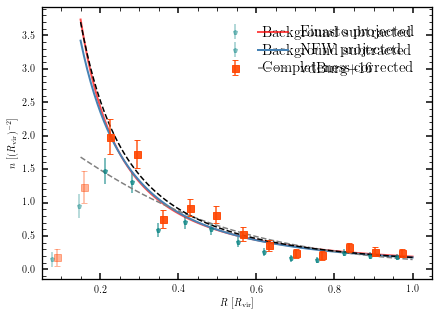

In [12]:
fig, ax = plt.subplots(figsize=(7, 5), sharey=True)

name = 'udg'
GALARY = '/tigress/jiaxuanl/public_html/galary/'
thresh = None

udg_cat = Table.read(
    f'{GALARY}/catalogs/nsa_z001_004/{name}_z001_004_spergel_after_viz_w_missed.fits')
udg_cat = udg_cat[udg_cat['completeness'] > 0.1]
flag = (udg_cat['rhalf_phys'] + udg_cat['rhalf_phys_err'] >= 1.5
       ) & (udg_cat['SB_eff_avg'][:, 0] + udg_cat['SB_eff_avg_err'][:, 0] >= 25)
udg_cat = udg_cat[flag]

udg_cat = udg_cat[udg_cat['host_stellar_mass'] < 10.8]

fake_udg_cat = Table.read(f'./Catalog/random_field/fake_{name}_cat_{date}.fits')
fake_udg_cat = fake_udg_cat[fake_udg_cat['completeness'] > 0.1]

fig, ax = plot_radial_number_profile(udg_cat, fake_udg_cat, 24, n_bins=14,
                                     fake_udg_repeats=10*20, name='UDG', ax=ax, r_min=0.2,
                                     refit=True, verbose=True)
plt.xlim(0.05, 1.05)

from colossus.cosmology import cosmology
from colossus.halo import profile_nfw, profile_einasto

p_ein_vdb = profile_einasto.EinastoProfile(
        rhos=22, alpha=0.15, rs=0.1, z=0.0, mdef='vir')

r = np.linspace(0.15, 1, 100)
line3 = plt.plot(r, p_ein_vdb.surfaceDensity(r), color='k',
                 label='Halo', ls='--')

# plt.savefig('/tigress/jiaxuanl/public_html/figure/udg_paper/radial_distribution.pdf',
#             bbox_inches='tight', dpi=50)

Deleted outdated persistence file, no further action needed.
-------------------------------------------------------------------------------------
Profile fit: Varying 2 / 2 parameters.
Could not find analytical derivative function for quantity Sigma.
Found solution in 9 steps. Best-fit parameters:
Parameter       rhos = 6.83e+01 [2.75e+01 .. 1.69e+02]
Parameter         rs = 1.17e-01 [8.26e-02 .. 1.65e-01]
chi2 / Ndof = 16.7 / 11 = 1.52
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Profile fit: Varying 3 / 3 parameters.
Could not find analytical derivative function for quantity Sigma.
Found solution in 29 steps. Best-fit parameters:
Parameter       rhos = 2.01e+00 [9.89e-01 .. 4.07e+00]
Parameter         rs = 3.05e-01 [2.18e-01 .. 4.26e-01]
Parameter      alpha = 4.42e-01 [2.69e-01 .. 7.27e-01]
chi2 / Ndof = 7.2 / 10 = 0.72
--------------------------------------

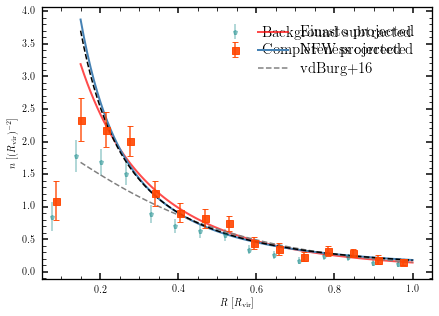

In [6]:
fig, ax = plt.subplots(figsize=(7, 5), sharey=True)

name = 'udg'
GALARY = '/tigress/jiaxuanl/public_html/galary/'
thresh = None

udg_cat = Table.read(
    f'{GALARY}/catalogs/nsa_z001_004/{name}_z001_004_spergel_after_viz_w_missed.fits')
udg_cat = udg_cat[udg_cat['completeness'] > 0.1]
flag = (udg_cat['rhalf_phys'] + udg_cat['rhalf_phys_err'] >= 1.5
       ) & (udg_cat['SB_eff_avg'][:, 0] + udg_cat['SB_eff_avg_err'][:, 0] >= 25)
udg_cat = udg_cat[flag]

fake_udg_cat = Table.read(f'./Catalog/random_field/fake_{name}_cat_{date}.fits')
fake_udg_cat = fake_udg_cat[fake_udg_cat['completeness'] > 0.1]

fig, ax = plot_radial_number_profile(udg_cat, fake_udg_cat, 24, n_bins=15,
                                     fake_udg_repeats=10*20, name='UDG', ax=ax, r_min=0.15,
                                     refit=True, verbose=True)
plt.xlim(0.05, 1.05)

from colossus.cosmology import cosmology
from colossus.halo import profile_nfw, profile_einasto

p_ein_vdb = profile_einasto.EinastoProfile(
        rhos=22, alpha=0.15, rs=0.1, z=0.0, mdef='vir')

r = np.linspace(0.15, 1, 100)
line3 = plt.plot(r, p_ein_vdb.surfaceDensity(r), color='k',
                 label='Halo', ls='--')

# plt.savefig('/tigress/jiaxuanl/public_html/figure/udg_paper/radial_distribution.pdf',
#             bbox_inches='tight', dpi=50)

-------------------------------------------------------------------------------------
Profile fit: Varying 2 / 2 parameters.
Could not find analytical derivative function for quantity Sigma.
Found solution in 9 steps. Best-fit parameters:
Parameter       rhos = 7.07e+01 [2.31e+01 .. 2.17e+02]
Parameter         rs = 1.14e-01 [7.46e-02 .. 1.75e-01]
chi2 / Ndof = 59.6 / 20 = 2.98
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Profile fit: Varying 3 / 3 parameters.
Could not find analytical derivative function for quantity Sigma.
Found solution in 20 steps. Best-fit parameters:
Parameter       rhos = 3.21e+00 [7.34e-01 .. 1.41e+01]
Parameter         rs = 2.42e-01 [1.23e-01 .. 4.78e-01]
Parameter      alpha = 3.32e-01 [1.52e-01 .. 7.25e-01]
chi2 / Ndof = 31.1 / 19 = 1.64
-------------------------------------------------------------------------------------
NFW conc = 8

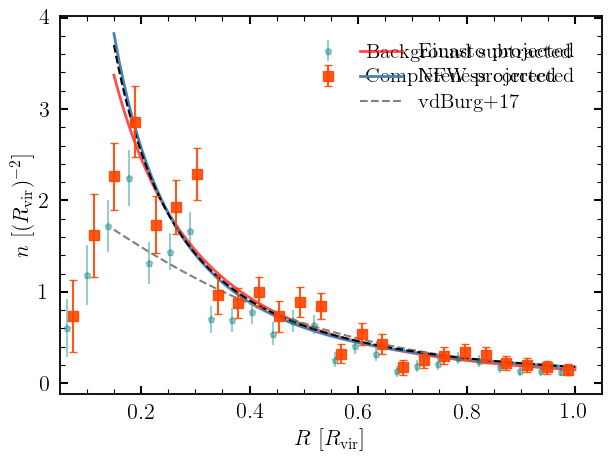

In [130]:
fig, ax = plt.subplots(figsize=(7, 5), sharey=True)

name = 'udg'
GALARY = '/tigress/jiaxuanl/public_html/galary/'
thresh = None

udg_cat = Table.read(
    f'{GALARY}/catalogs/nsa_z001_004/{name}_z001_004_spergel_after_viz_w_missed.fits')
udg_cat = udg_cat[udg_cat['completeness'] > 0.1]
flag = (udg_cat['rhalf_phys'] + udg_cat['rhalf_phys_err'] >= 1.5
       ) & (udg_cat['SB_eff_avg'][:, 0] + udg_cat['SB_eff_avg_err'][:, 0] >= 25)
udg_cat = udg_cat[flag]

fake_udg_cat = Table.read(f'./Catalog/random_field/fake_{name}_cat_220726.fits')
fake_udg_cat = fake_udg_cat[fake_udg_cat['completeness'] > 0.1]

fig, ax = plot_radial_number_profile(udg_cat, fake_udg_cat, 24, n_bins=15,
                                     fake_udg_repeats=10*20, name='UDG', ax=ax, r_min=0.15,
                                     refit=True, verbose=True)
plt.xlim(0.05, 1.05)

from colossus.cosmology import cosmology
from colossus.halo import profile_nfw, profile_einasto

p_ein_vdb = profile_einasto.EinastoProfile(
        rhos=22, alpha=0.15, rs=0.1, z=0.0, mdef='vir')

r = np.linspace(0.15, 1, 100)
line3 = plt.plot(r, p_ein_vdb.surfaceDensity(r), color='k',
                 label='Halo', ls='--')

# plt.savefig('/tigress/jiaxuanl/public_html/figure/udg_paper/radial_distribution.pdf',
#             bbox_inches='tight', dpi=50)

-------------------------------------------------------------------------------------
Profile fit: Varying 2 / 2 parameters.
Could not find analytical derivative function for quantity Sigma.
Found solution in 9 steps. Best-fit parameters:
Parameter       rhos = 1.10e+02 [2.20e+01 .. 5.55e+02]
Parameter         rs = 9.17e-02 [5.04e-02 .. 1.67e-01]
chi2 / Ndof = 17.1 / 9 = 1.90
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Profile fit: Varying 3 / 3 parameters.
Could not find analytical derivative function for quantity Sigma.
Found solution in 29 steps. Best-fit parameters:
Parameter       rhos = 2.00e+00 [4.28e-01 .. 9.37e+00]
Parameter         rs = 2.81e-01 [1.39e-01 .. 5.69e-01]
Parameter      alpha = 3.98e-01 [1.64e-01 .. 9.64e-01]
chi2 / Ndof = 9.0 / 8 = 1.12
-------------------------------------------------------------------------------------
NFW conc = 10.9

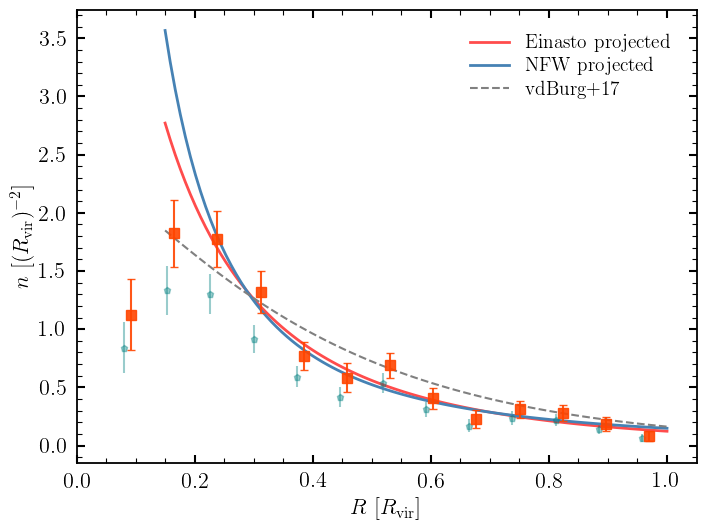

In [77]:
name = 'upg'
GALARY = '/tigress/jiaxuanl/public_html/galary/'
thresh = 1.5

udg_cat = Table.read(
    f'{GALARY}/catalogs/nsa_z001_004/{name}_z001_004_spergel_after_viz_{thresh}sigma.fits')
udg_cat = udg_cat[udg_cat['completeness'] > 0.1]

fake_udg_cat = Table.read(f'./Catalog/random_field/fake_{name}_cat_{thresh}sigma_220726.fits')
fake_udg_cat = fake_udg_cat[fake_udg_cat['completeness'] > 0.1]


fig, ax = plot_radial_number_profile(udg_cat, fake_udg_cat, 24, n_bins=13,
                                     fake_udg_repeats=10*20, name='UPG_1.5sigma', r_min=0.23,
                                     refit=True, verbose=True, dots_legend=False, lines_legend=True)

---

In [22]:
date = '221025'

-------------------------------------------------------------------------------------
Profile fit: Varying 2 / 2 parameters.
Could not find analytical derivative function for quantity Sigma.
Found solution in 9 steps. Best-fit parameters:
Parameter       rhos = 1.07e+02 [3.61e+01 .. 3.17e+02]
Parameter         rs = 1.00e-01 [6.71e-02 .. 1.50e-01]
chi2 / Ndof = 8.2 / 8 = 1.03
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
Profile fit: Varying 3 / 3 parameters.
Could not find analytical derivative function for quantity Sigma.
Found solution in 25 steps. Best-fit parameters:
Parameter       rhos = 3.16e+00 [6.83e-01 .. 1.47e+01]
Parameter         rs = 2.49e-01 [1.25e-01 .. 4.95e-01]
Parameter      alpha = 3.28e-01 [1.58e-01 .. 6.81e-01]
chi2 / Ndof = 4.0 / 7 = 0.57
-------------------------------------------------------------------------------------
NFW conc = 9.957

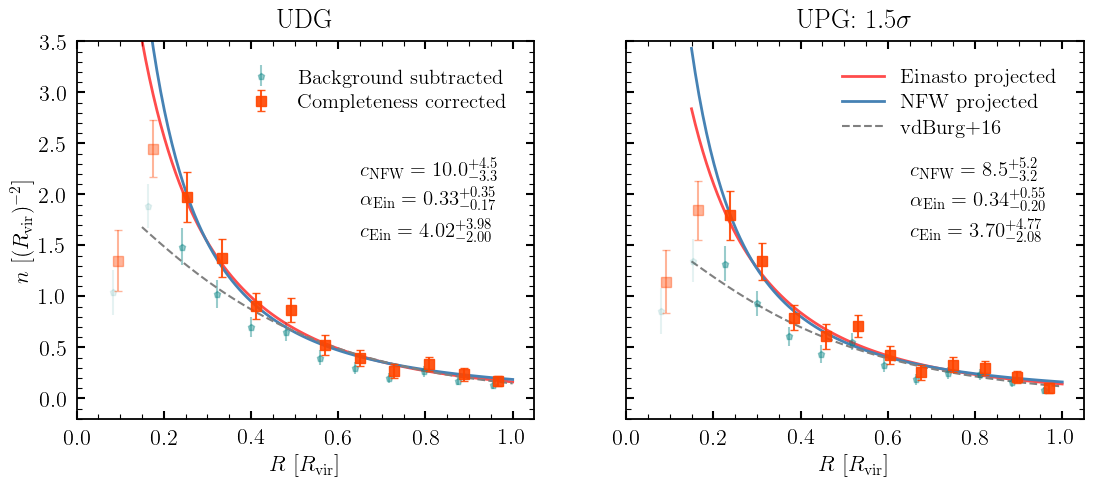

In [26]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(13, 5), sharey=True)

### UDG ###
name = 'udg'
GALARY = '/tigress/jiaxuanl/public_html/galary/'
thresh = None

udg_cat = Table.read(
    f'{GALARY}/catalogs/nsa_z001_004/{name}_z001_004_spergel_after_viz_w_missed.fits')
flag = (udg_cat['rhalf_phys'] + udg_cat['rhalf_phys_err'] >= 1.5
       ) & (udg_cat['SB_eff_avg'][:, 0] + udg_cat['SB_eff_avg_err'][:, 0] >= 25)
udg_cat = udg_cat[flag]
udg_cat = udg_cat[udg_cat['completeness'] > 0.1]

fake_udg_cat = Table.read(f'./Catalog/random_field/fake_{name}_cat_{date}.fits')
fake_udg_cat = fake_udg_cat[fake_udg_cat['completeness'] > 0.1]

fig, ax1 = plot_radial_number_profile(udg_cat, fake_udg_cat, 24, n_bins=12,
                                     fake_udg_repeats=10*20, name='UDG', ax=ax1, r_min=0.2,
                                     refit=True, verbose=True, dots_legend=True, lines_legend=False)
ax1.set_ylim(-0.2, 3.5)
# NFW conc = 9.957 + [ 4.94268962 -3.30299983]
# Einasto alpha = 0.328 + [-0.16996295  0.35304234]
# Einasto conc = 4.020 + [ 3.98656263 -2.00163582]
ax1.text(0.65, 2.2, r'$c_{\rm NFW} = 10.0^{+4.5}_{-3.3}$', fontsize=15)
ax1.text(0.65, 1.9, r'$\alpha_{\rm Ein} = 0.33^{+0.35}_{-0.17}$', fontsize=15)
ax1.text(0.65, 1.6, r'$c_{\rm Ein} = 4.02^{+3.98}_{-2.00}$', fontsize=15)

# ### UPG ###
name = 'upg'
GALARY = '/tigress/jiaxuanl/public_html/galary/'
thresh = 1.5

udg_cat = Table.read(
    f'{GALARY}/catalogs/nsa_z001_004/{name}_z001_004_spergel_after_viz_{thresh}sigma.fits')
udg_cat = udg_cat[udg_cat['completeness'] > 0.1]

fake_udg_cat = Table.read(f'./Catalog/random_field/fake_{name}_cat_{thresh}sigma_{date}.fits')
fake_udg_cat = fake_udg_cat[fake_udg_cat['completeness'] > 0.1]


fig, ax2 = plot_radial_number_profile(udg_cat, fake_udg_cat, 24, n_bins=13,
                                     fake_udg_repeats=10*20, name='UPG_1.5sigma', ax=ax2, r_min=0.2,
                                      amp_vdb16=0.4,
                                     refit=True, verbose=True, dots_legend=False, lines_legend=True)
ax2.set_ylabel('')
ax1.set_title('UDG')
ax2.set_title('UPG: $1.5\sigma$')
ax2.set_ylim(-0.2, 3.5)

# NFW conc = 8.484 + [ 5.24964986 -3.24297117]
# Einasto alpha = 0.340 + [-0.21170919  0.56060548]
# Einasto conc = 3.690 + [ 4.77842454 -2.08214096]

ax2.text(0.65, 2.2, r'$c_{\rm NFW} = 8.5^{+5.2}_{-3.2}$', fontsize=15)
ax2.text(0.65, 1.9, r'$\alpha_{\rm Ein} = 0.34^{+0.55}_{-0.20}$', fontsize=15)
ax2.text(0.65, 1.6, r'$c_{\rm Ein} = 3.70^{+4.77}_{-2.08}$', fontsize=15)

# # # plt.tight_layout()
plt.savefig('/tigress/jiaxuanl/public_html/figure/udg_paper/radial_distribution_new.pdf',
            bbox_inches='tight', dpi=50)

### Cumulative radial profile

In [26]:
### UDG ###
name = 'udg'
GALARY = '/tigress/jiaxuanl/public_html/galary/'
thresh = None

udg_cat = Table.read(
    f'{GALARY}/catalogs/nsa_z001_004/{name}_z001_004_spergel_after_viz_w_missed.fits')
flag = (udg_cat['rhalf_phys'] + udg_cat['rhalf_phys_err'] >= 1.5
       ) & (udg_cat['SB_eff_avg'][:, 0] + udg_cat['SB_eff_avg_err'][:, 0] >= 25)
udg_cat = udg_cat[flag]
udg_cat = udg_cat[udg_cat['completeness'] > 0.1]

fake_udg_cat = Table.read(f'./Catalog/random_field/fake_{name}_cat_{date}.fits')
fake_udg_cat = fake_udg_cat[fake_udg_cat['completeness'] > 0.1]

In [148]:
name = 'upg'
GALARY = '/tigress/jiaxuanl/public_html/galary/'
thresh = 1.5

udg_cat = Table.read(
    f'{GALARY}/catalogs/nsa_z001_004/{name}_z001_004_spergel_after_viz_{thresh}sigma.fits')
udg_cat = udg_cat[udg_cat['completeness'] > 0.1]

fake_udg_cat = Table.read(f'./Catalog/random_field/fake_{name}_cat_{thresh}sigma_{date}.fits')
fake_udg_cat = fake_udg_cat[fake_udg_cat['completeness'] > 0.1]

# udg_cat = udg_cat[udg_cat['host_stellar_mass'] >= 10.8]

In [149]:
from colossus.cosmology import cosmology
from colossus.halo import profile_nfw, profile_einasto
from astropy.coordinates import SkyCoord
import astropy.units as u
cosmology.setCosmology('planck15')

In [150]:
udg_coord = SkyCoord(udg_cat['ra'], udg_cat['dec'], unit='deg')
host_coord = SkyCoord(udg_cat['host_RA'], udg_cat['host_DEC'], unit='deg')
dist = udg_coord.separation(host_coord)
dist_ratio = dist.to(u.deg).value / udg_cat['host_r_vir_ang'].data

unique_name, ind = np.unique(udg_cat['host_name'].data, return_index=True)

# number density per square degree of contaminants
fake_udg_repeats = 200
fake_udg_area = 24
density_bkg = len(fake_udg_cat) / (fake_udg_repeats) / \
    fake_udg_area  # bkg per sqr deg

In [152]:
from sample_cuts import moving_binned_statistic

In [169]:
n_bins = 12
range_0 = np.array([0.05, 1.0])
n_slide = 1

In [170]:
# completeness in each radial distance bin
output, cen = moving_binned_statistic(dist_ratio,
                                      udg_cat['completeness'],
                                      x_err=None,
                                      bins=n_bins, range_=range_0,
                                      statistic=np.nanmean,
                                      n_slide=n_slide)
comp_avg = np.nanmean(output, axis=0)
comp_std = np.nanstd(output, axis=0)

In [171]:
bins = np.histogram_bin_edges(dist_ratio, bins=n_bins, range=range_0)

n_cens = []
for hostname in unique_name[:]:
    output, cen = moving_binned_statistic(dist_ratio[udg_cat['host_name'] == hostname],
                                          dist_ratio[udg_cat['host_name']
                                                     == hostname],
                                          x_err=None,
                                          bins=n_bins, range_=range_0,
                                          statistic='count', n_slide=n_slide)
    
    # number per annulus area [R_vir^2]
    _n_cen = np.nanmean(output, axis=0) # / np.diff(np.pi * bins**2)
    
    contam_profile = density_bkg * np.diff(
        np.pi * (bins * udg_cat[udg_cat['host_name']== hostname]['host_r_vir_ang'][:, None])**2
    ) # number of contam in each radial bin

    n_cens.append(_n_cen - contam_profile[0])

In [176]:
n_cum = np.cumsum(np.mean(n_cens, axis=0)) / comp_avg
n_cum /= n_cum[-1]

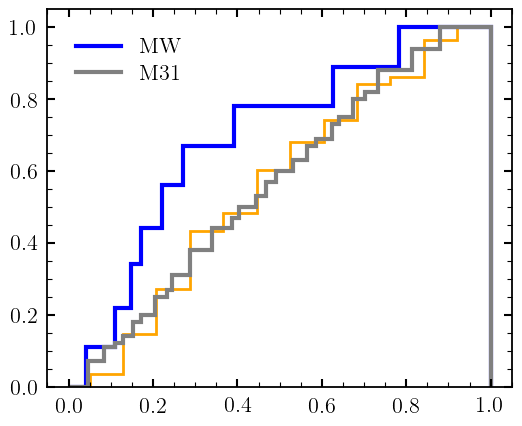

In [177]:
plt.stairs(n_cum, bins, lw=2, color='orange')
# plt.hist(dist_ratio, cumulative=True, density=True, histtype='step', bins=bins)

plt.stairs(MW[1:, 1], MW[:, 0] / 300, label='MW', color='b', lw=3)
plt.stairs(M31[1:, 1], M31[:, 0] / 300, label='M31', color='gray', lw=3)

plt.legend(loc='upper left')

In [155]:
MW = np.array([-0, -0.00,
12.30, 0.00,
32.94, 0.11,
44.36, 0.22,
51.83, 0.34,
66.76, 0.44,
81.26, 0.56,
117.28, 0.67,
187.99, 0.78,
234.99, 0.89,
300.44, 1.00,]).reshape(-1, 2)

M31 = np.array([396.19, 0.00,
410.25, 0.00,
421.23, 0.07,
429.14, 0.11,
434.85, 0.12,
442.31, 0.14,
448.02, 0.18,
457.69, 0.20,
466.03, 0.25,
469.55, 0.27,
482.72, 0.31,
498.10, 0.38,
512.15, 0.44,
517.42, 0.47,
529.28, 0.50,
536.75, 0.53,
543.34, 0.57,
555.64, 0.60,
565.74, 0.63,
571.89, 0.67,
583.31, 0.69,
588.14, 0.73,
598.24, 0.75,
606.59, 0.80,
616.25, 0.82,
639.97, 0.88,
660.18, 0.94,
696.19, 1.00,
]).reshape(-1, 2)

M31[:, 0] -= 396.19